In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Test code, do not use!

In [ ]:
# Importing data
# fn = "/selected_catchments_data/streamflows/09306242_streamflow_qc.txt"
# df = pd.read_fwf(fn, header=None, )
# df.columns =['code', 'year', 'month', 'day', 'discharge_cfps', 'quality']
# df.drop(df[df["quality"] == "M"].index, inplace=True)
# df

In [ ]:
# Generating date column and adding water year
# cols = ["year", "month", "day"]
# df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# df['date'] = pd.to_datetime(df['date'])
# df['water_year'] = df.date.dt.year.where(df.date.dt.month < 10, df.date.dt.year + 1)

#annual_mean_discharge_rate = df.groupby('water_year')[['discharge_cfps']].mean()
#display(annual_mean_discharge_rate)
#annual_mean_discharge_rate.plot.bar(figsize=(8, 6), xlabel='Water Year', ylabel='Discharge (cubic feet / sec)', legend=False)



Using the above codes for performing batch process.

In [2]:
# (Batch Process) Preparing the input data
fn = "Gage_Streamflow/*.txt"
l = [pd.read_fwf(filename, header=None, ) for filename in glob.glob(fn)]
df_gage = pd.concat(l, axis=0)
df_gage.columns =['code', 'year', 'month', 'day', 'discharge_cfps', 'quality']
df_gage.drop(df_gage[df_gage["quality"] == "M"].index, inplace=True)
df_gage['QQ'] = df_gage['discharge_cfps']*((3600*24)/3.28**3)                         # m3/day (but since it's already a daily value, this is the total volume for that day)
df_gage.drop(columns=['discharge_cfps','quality'], inplace=True)

In [ ]:
# QQ_m_sum = df.groupby(['code','year','month'])[['QQ']].sum()
# QQ_m_avg = df.groupby(['code','month'])[['QQ']].mean()
# QQ_m_avg



# dfCombined = QQ_m_avg.join(dfA)            # combine streamflow df with Area df
# QQn = dfCombined.QQ / dfCombined.area       # normalize the streamflow by catchment area [mm3/m2] > [m]
# dfCombined['QQn'] = QQn * 1000              # convert meters of streamflow to millimeters [mm]
# dfCombined

QQ
code     month               
1639500  1      358150.496511
         2      408902.256110
         3      504820.877887
         4      409809.035409
         5      310865.571221
...                       ...
11480390 8        2570.855022
         9        1114.335296
         10       5606.939815
         11      46165.940096
         12      97295.371792

[144 rows x 1 columns]

### Add water year to QQ data

In [ ]:
# cols = ["year", "month", "day"]
# df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# df['date'] = pd.to_datetime(df['date'])
# df['water_year'] = df.date.dt.year.where(df.date.dt.month < 10, df.date.dt.year + 1)

In [ ]:
dfQQ_annSum = df.groupby(['code', 'water_year'])[['discharge_cfps']].sum()    # calc annual streamflow by catchment and water year
dfQQ_annSum['QQ'] = dfQQ_annSum['discharge_cfps']*((3600*24)/3.28**3)         # convert streamflow [ft3/s] > [m3/day]
dfQQ_annSum.drop(columns='discharge_cfps', inplace=True)                      # drop old discharge columnn
dfQQ_annSum

QQ
code     water_year              
1639500  1980        7.335817e+07
         1981        6.567737e+07
         1982        7.637467e+07
         1983        9.491683e+07
         1984        1.579695e+08
...                           ...
11480390 2010        2.746242e+07
         2011        3.241349e+07
         2012        1.970238e+07
         2013        2.370080e+07
         2014        1.117370e+07

[420 rows x 1 columns]

In [ ]:
# manually enter catchment area by catchment code for normalization of streamflow
dfA = pd.DataFrame({'code':[11480390, 11381500, 9312600, 9306242, 9035900, 5503800, 5591550, 3340800, 3241500, 3144000, 3076600, 1639500],
                    'area':[242.6,337.63, 195.29, 81.99, 72.84, 212.64, 96.21, 357.65, 170.91, 363.41, 127.4, 267.18]})

dfA.area = dfA.area*1e6                     # convert area from km2 to m2
dfA = dfA.set_index('code')                 # set catchment code as index for pd.join()
dfA = dfA.reindex(index=dfA.index[::-1])    # reverse index b/c I wrote it out backwards (whoops)

dfCombined = dfQQ_annSum.join(dfA)            # combine streamflow df with Area df
QQn = dfCombined.QQ / dfCombined.area       # normalize the streamflow by catchment area [mm3/m2] > [m]
dfCombined['QQn'] = QQn * 1000              # convert meters of streamflow to millimeters [mm]
dfCombined

QQ         area         QQn
code     water_year                                       
1639500  1980        7.335817e+07  267180000.0  274.564618
         1981        6.567737e+07  267180000.0  245.816939
         1982        7.637467e+07  267180000.0  285.854749
         1983        9.491683e+07  267180000.0  355.254230
         1984        1.579695e+08  267180000.0  591.247288
...                           ...          ...         ...
11480390 2010        2.746242e+07  242600000.0  113.200393
         2011        3.241349e+07  242600000.0  133.608764
         2012        1.970238e+07  242600000.0   81.213431
         2013        2.370080e+07  242600000.0   97.694988
         2014        1.117370e+07  242600000.0   46.058112

[420 rows x 3 columns]

In [ ]:
# codeList = df.code.unique().tolist()
# wyList = df.water_year.unique().tolist()
# df1 = df.copy()

# Nelement = len(df.code)
# QQarr = np.ones((Nelement))

# i = 0
# while i <= Nelement:
#     for k in codeList:
#         for j in wyList:
#             start = i
#             end = i + len(df1[(df1.code == k) & (df1.water_year == j)].discharge_cfps)
#             QQarr[start:end+1] = (QQann_sum.loc[k].loc[j][0]) 
#     i += end

# print(start, end)
# print(Nelement)
# QQarr

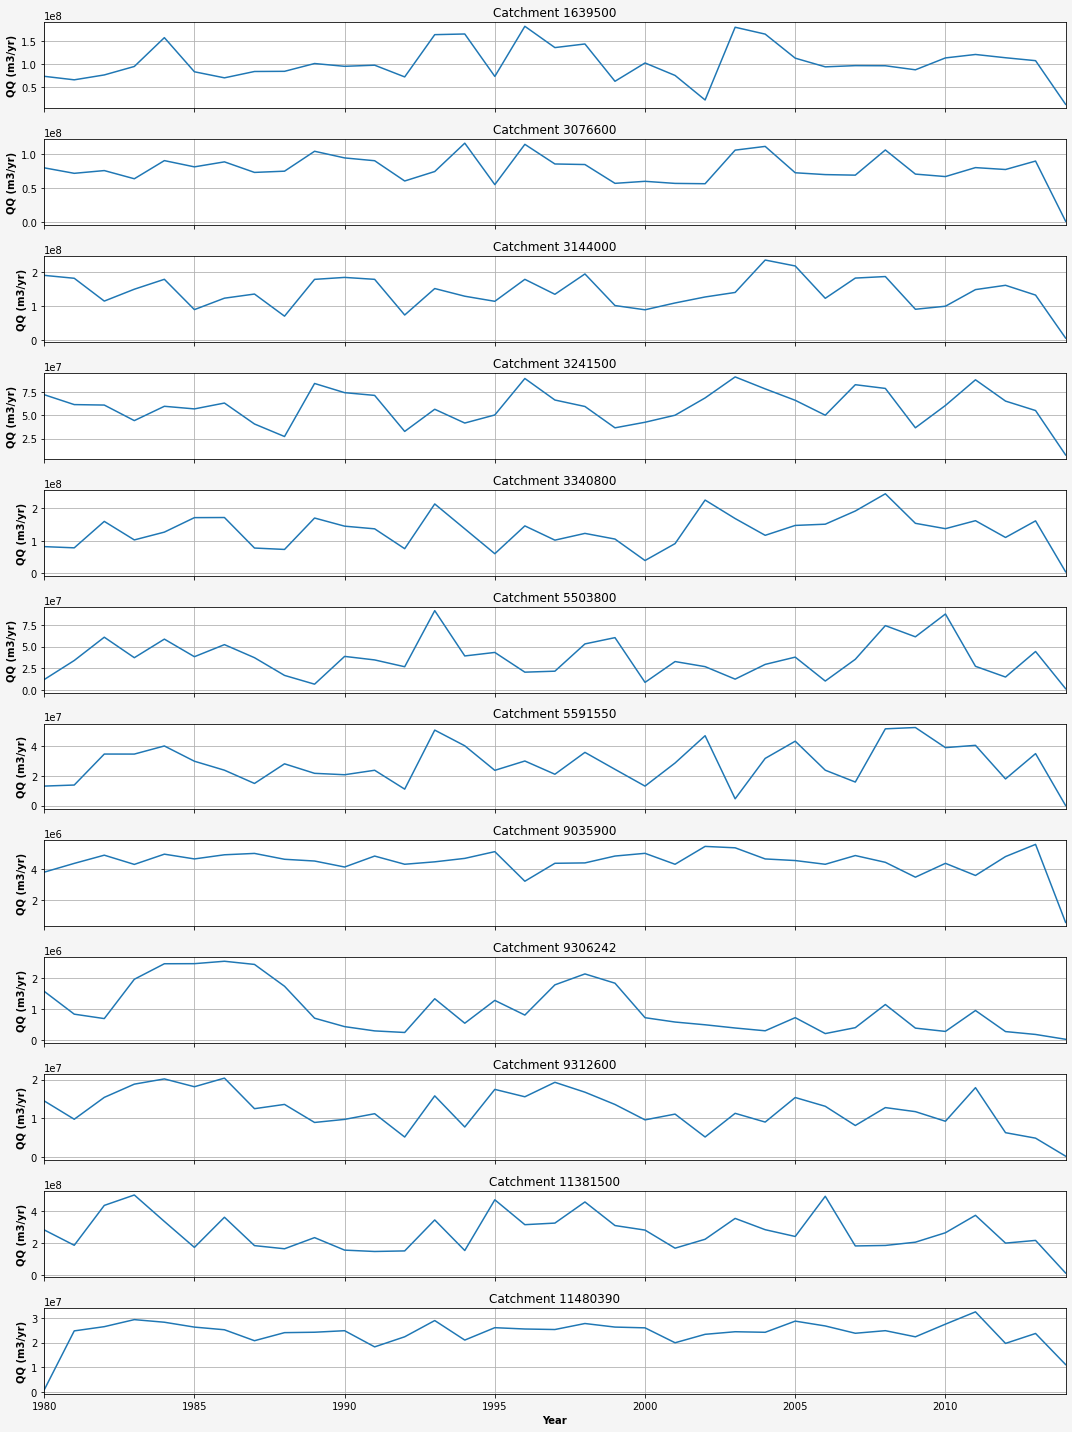

In [ ]:
catchmentList = dfQQ_annSum.index.get_level_values(0).unique().to_list()
Ncodes = len(catchmentList)
catchmentIndex = np.arange(0, Ncodes, 1)
startPeriod = 2014

fig, ax = plt.subplots(12,1, figsize=(15,20), sharex=True)
fig.set_facecolor('whitesmoke')

for i in catchmentIndex:
    catchment = dfQQ_annSum.loc[catchmentList[i]]
    periodStart = catchment.index.min(); periodEnd = catchment.index.max()
    x = catchment.index
    y = catchment.QQ.values
    ax[i].set_xlim(periodStart, periodEnd)
    ax[i].set_ylabel('QQ (m3/yr)', fontweight='bold')
    ax[-1].set_xlabel('Year', fontweight='bold')
    ax[i].plot(x,y)
    ax[i].set_title('Catchment {}'.format(str(catchmentList[i])))
    #ax[i].text(0.14, 0.1, 'Yearly Streamflow for Catchment {}'.format(str(catchmentList[i])), horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes, bbox=dict(facecolor='white', edgecolor='k', pad=3.0))
    ax[i].grid(True)

plt.tight_layout()
plt.savefig('interannualQQ-12catchments')
plt.show()
    


In [ ]:




#annual_mean_discharge_rate.groupby(['code'])[['discharge_cfps']].mean()
#display(annual_mean_discharge_rate)
annual_mean_discharge_rate = dfQQ_annSum.groupby(['code'])[['QQ']].mean()
annual_mean_discharge_rate.QQ = annual_mean_discharge_rate.QQ.round()
display(annual_mean_discharge_rate)



,QQ
code,
1639500,102501268.0
3076600,77868754.0
3144000,139524179.0
3241500,59195429.0
3340800,130574933.0
5503800,36833456.0
5591550,28120655.0
9035900,4425541.0
9306242,1006911.0


In [ ]:
# Exporting to dataframe to an excel file
fn = '/Users/omidzandi/Desktop/PhD/Courses/Fundamentals_of_Surface_Hydrology/class_project/selected_catchments_data/Surface Water Project'
annual_mean_discharge_rate.to_excel(fn + "/" + "selected_catchments_discharge.xlsx")

##################################
##################################
##################################

Let's get to the climate forcings.

##################################
##################################
##################################

In [3]:
fn = "daymet_gageData/*.xlsx"
l = [pd.read_excel(filename, skiprows=3) for filename in glob.glob(fn)]


In [4]:
# (Batch Process) Preparing the input data
# fn = "/Gage_Mean_Forcing/*.xlsx"
# l = [pd.read_excel(filename, skiprows=3) for filename in glob.glob(fn)]
df_daymet = pd.concat(l, axis=0)
df_daymet.drop(['Hr', 'dayl(s)', 'srad(W/m2)', 'swe(mm)', 'vp(Pa)'], inplace=True, axis=1)
df_daymet

,Gage_ID,Year,Mnth,Day,prcp(mm/day),tmax(C),tmin(C)
0,1639500,1980,1,1,0.00,6.68,-5.72
1,1639500,1980,1,2,0.00,4.34,-4.92
2,1639500,1980,1,3,0.00,3.43,-3.49
3,1639500,1980,1,4,1.86,1.33,-5.60
4,1639500,1980,1,5,4.89,-2.53,-6.12
...,...,...,...,...,...,...,...
12779,11480390,2014,12,27,0.00,9.51,-1.72
12780,11480390,2014,12,28,0.00,9.73,-0.55
12781,11480390,2014,12,29,0.00,6.41,-3.19
12782,11480390,2014,12,30,0.00,5.70,-4.19


In [5]:
df_daymet = df_daymet.dropna()
df_daymet.Mnth.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [6]:
# Calculating average temperature
df_daymet = df_daymet.astype({'Gage_ID':'int', 'Year':'int','Mnth':'int',     # change Gage_ID to an integer from a float
                'Day':'int'})
df_daymet = df_daymet.rename(columns={'prcp(mm/day)':'PP', 'Gage_ID':'code'}) # change precip column name to simpler format [mm/day]
df_daymet['Tavg'] = df_daymet[['tmax(C)', 'tmin(C)']].mean(axis=1)            # calc the average temperature [C]
df_daymet.drop(['tmax(C)', 'tmin(C)'], inplace=True, axis=1)           # drop max/min temperature columns
df_daymet

,code,Year,Mnth,Day,PP,Tavg
0,1639500,1980,1,1,0.00,0.480
1,1639500,1980,1,2,0.00,-0.290
2,1639500,1980,1,3,0.00,-0.030
3,1639500,1980,1,4,1.86,-2.135
4,1639500,1980,1,5,4.89,-4.325
...,...,...,...,...,...,...
12779,11480390,2014,12,27,0.00,3.895
12780,11480390,2014,12,28,0.00,4.590
12781,11480390,2014,12,29,0.00,1.610
12782,11480390,2014,12,30,0.00,0.755


#### Calculate the average cumulative metric by catchment

In [146]:
# Workflow: 1) sum daily observations into monthly cumulative value, 2) average monthly cumulative values
QQ_m_sum = df_gage.groupby(['code','year','month'])[['QQ']].sum()           # calc cumulative streamflow for each month/year/catchment
QQ_m_avg = df_gage.groupby(['code','month'])[['QQ']].mean()                 # calc avg cumulative streamflow by month/catchment

PP_m_sum = df_daymet.groupby(['code', 'Year', 'Mnth'])[['PP']].sum()        # calculate cumulative precip for each month/year/catchment
PP_m_avg = PP_m_sum.groupby(['code','Mnth'])[['PP']].mean()                 # calc avg cumulative precip by month/catchment

tavg_m_sum = df_daymet.groupby(['code', 'Year', 'Mnth'])[['Tavg']].mean()   # calc avg daily temp for each month/year/catchment
tavg_m_avg = tavg_m_sum.groupby(['code','Mnth'])[['Tavg']].mean()           # calc avg daily temp by month/catchment

# Concatenate the three new dataframes into one comprehensive dataframe
df_m_avg = QQ_m_avg.join(PP_m_avg, on=['code', 'month'])                    # join streamflow and precip dataframes
df_m_avg = df_m_avg.join(tavg_m_avg, on=['code', 'month'])                  # join avg temp dataframe to combined dataframe

In [147]:
df_m_avg.reset_index(inplace=True)
df_m_avg = pd.melt(frame=df_m_avg, value_vars=['QQ','PP','Tavg'],
                  id_vars=['code','month'],
                  value_name='mean',
                  var_name='metric',
                  ignore_index=False)



In [153]:
df_m_std[(df_m_std['code']==1639500) & (df_m_std['month']==1)]

,code,month,metric,std
0,1639500,1,QQ,7.208116e+06
0,1639500,1,PP,3.929689e+01
0,1639500,1,Tavg,2.620995e+00


In [156]:
QQ_m_avg

QQ
code     month               
1639500  1      358150.496511
         2      408902.256110
         3      504820.877887
         4      409809.035409
         5      310865.571221
...                       ...
11480390 8        2570.855022
         9        1114.335296
         10       5606.939815
         11      46165.940096
         12      97295.371792

[144 rows x 1 columns]

#### Calculate standard deviation of monthly cumulative values

In [149]:
PP_m_sum.loc[(1639500, slice(None), 1)].std()
PP_m_sum.loc[(1639500, slice(None), 1)]

QQ_m_std = QQ_m_sum.groupby(['code','month']).std()
PP_m_std = PP_m_sum.groupby(['code','Mnth']).std()
tavg_m_std = tavg_m_sum.groupby(['code','Mnth']).std()

df_m_std = pd.concat([QQ_m_std, PP_m_std, tavg_m_std], axis=1, ignore_index=False)
df_m_std.index.set_names('month', level=1, inplace=True)
df_m_std.reset_index(inplace=True)
df_m_std = pd.melt(frame=df_m_std, value_vars=['QQ','PP','Tavg'], id_vars=['code','month'],value_name='std',var_name='metric',ignore_index=False)


In [154]:
df_m_metrics = pd.merge(df_m_avg, df_m_std, how='left', left_on=['code','month','metric'], right_on=['code','month','metric'])
df_m_metrics.set_index(['code','month'],inplace=True)
df_m_metrics

metric           mean           std
code     month                                    
1639500  1         QQ  358150.496511  7.208116e+06
         2         QQ  408902.256110  5.995222e+06
         3         QQ  504820.877887  9.873654e+06
         4         QQ  409809.035409  7.289930e+06
         5         QQ  310865.571221  5.803054e+06
...               ...            ...           ...
11480390 8       Tavg      17.707571  1.308889e+00
         9       Tavg      14.888048  1.481452e+00
         10      Tavg      10.077406  1.687087e+00
         11      Tavg       4.067319  2.006261e+00
         12      Tavg       0.724664  1.972005e+00

[432 rows x 3 columns]

In [ ]:
df_m_metrics.loc[(1639500), ['metric', 'mean']]['metric']

#df_m_avg[df_m_avg['metric']=='QQ']

In [ ]:
fig, ax = plt.subplots()
monthList = np.arange(1,13,1)
x = monthList
y = df_m_metrics[(df_m_metrics[('metric')]=='QQ')].loc[(1639500)][['mean']]
err = df_m_metrics[(df_m_metrics[('metric')]=='QQ')].loc[(1639500)][['std']]
ax.bar()

In [145]:
df_m_metrics[(df_m_metrics[('metric')]=='QQ')].loc[(1639500)]

,metric,mean,std
month,,,
1,QQ,358150.496511,7.208116e+06
2,QQ,408902.256110,5.995222e+06
3,QQ,504820.877887,9.873654e+06
4,QQ,409809.035409,7.289930e+06
5,QQ,310865.571221,5.803054e+06
6,QQ,239586.409461,5.138941e+06
7,QQ,158461.297382,3.819185e+06
8,QQ,118527.848050,2.702277e+06
9,QQ,173716.955986,6.556949e+06


In [106]:
catchmentList = df_m_metrics.index.get_level_values(level=0).unique().tolist()
Ncatchments = len(catchmentList)
catchementIndex = np.arange(0, Ncatchments, 1)

monthList = np.arange(1,13,1)
varList = ['QQ','PP','Tavg']

for k in catchmentIndex:
    

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [22]:
# toying around with multilevelindex
'''
print(df_m_avg.index.names)
print(df_m_avg.index.values)
'''

df_m_avg.loc[(1639500,1)]           # this line calls three column values for the Jan record for catchment 1639500
df_m_avg.loc[(1639500,1), 'QQ']     # this calls for the specified column, 'QQ' for the same month and catchment


QQ      358150.496511
PP          83.292857
Tavg        -0.599369
Name: (1639500, 1), dtype: float64

### Compute and add the Water Year to data

In [ ]:
# cols = ["Year", "Mnth", "Day"]                                                          # create variable to hold date columns
# df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")   # develop lambda function to turn date cols into string
# df['date'] = pd.to_datetime(df['date'])                                                 # convert string into datetime
# df['water_year'] = df.date.dt.year.where(df.date.dt.month < 10, df.date.dt.year + 1)    # constrain dates into water years

# annual_mean_discharge_rate = df.groupby(['Gage_ID', 'water_year'])[['PRCP(mm/day)', 'mean_temp(C)']].mean()
# #annual_mean_discharge_rate.groupby(['code'])[['discharge_cfps']].mean()
# #display(annual_mean_discharge_rate)
# annual_mean_discharge_rate = annual_mean_discharge_rate.groupby(['Gage_ID'])[['PRCP(mm/day)', 'mean_temp(C)']].mean().round(1)
# #annual_mean_discharge_rate.discharge_cfps = annual_mean_discharge_rate.discharge_cfps.round()
# display(annual_mean_discharge_rate)


In [ ]:
# df = dfCombined.join(PPann_sum, on=['code','water_year'])
# df.drop(columns=['area','QQ'], inplace=True)
# df

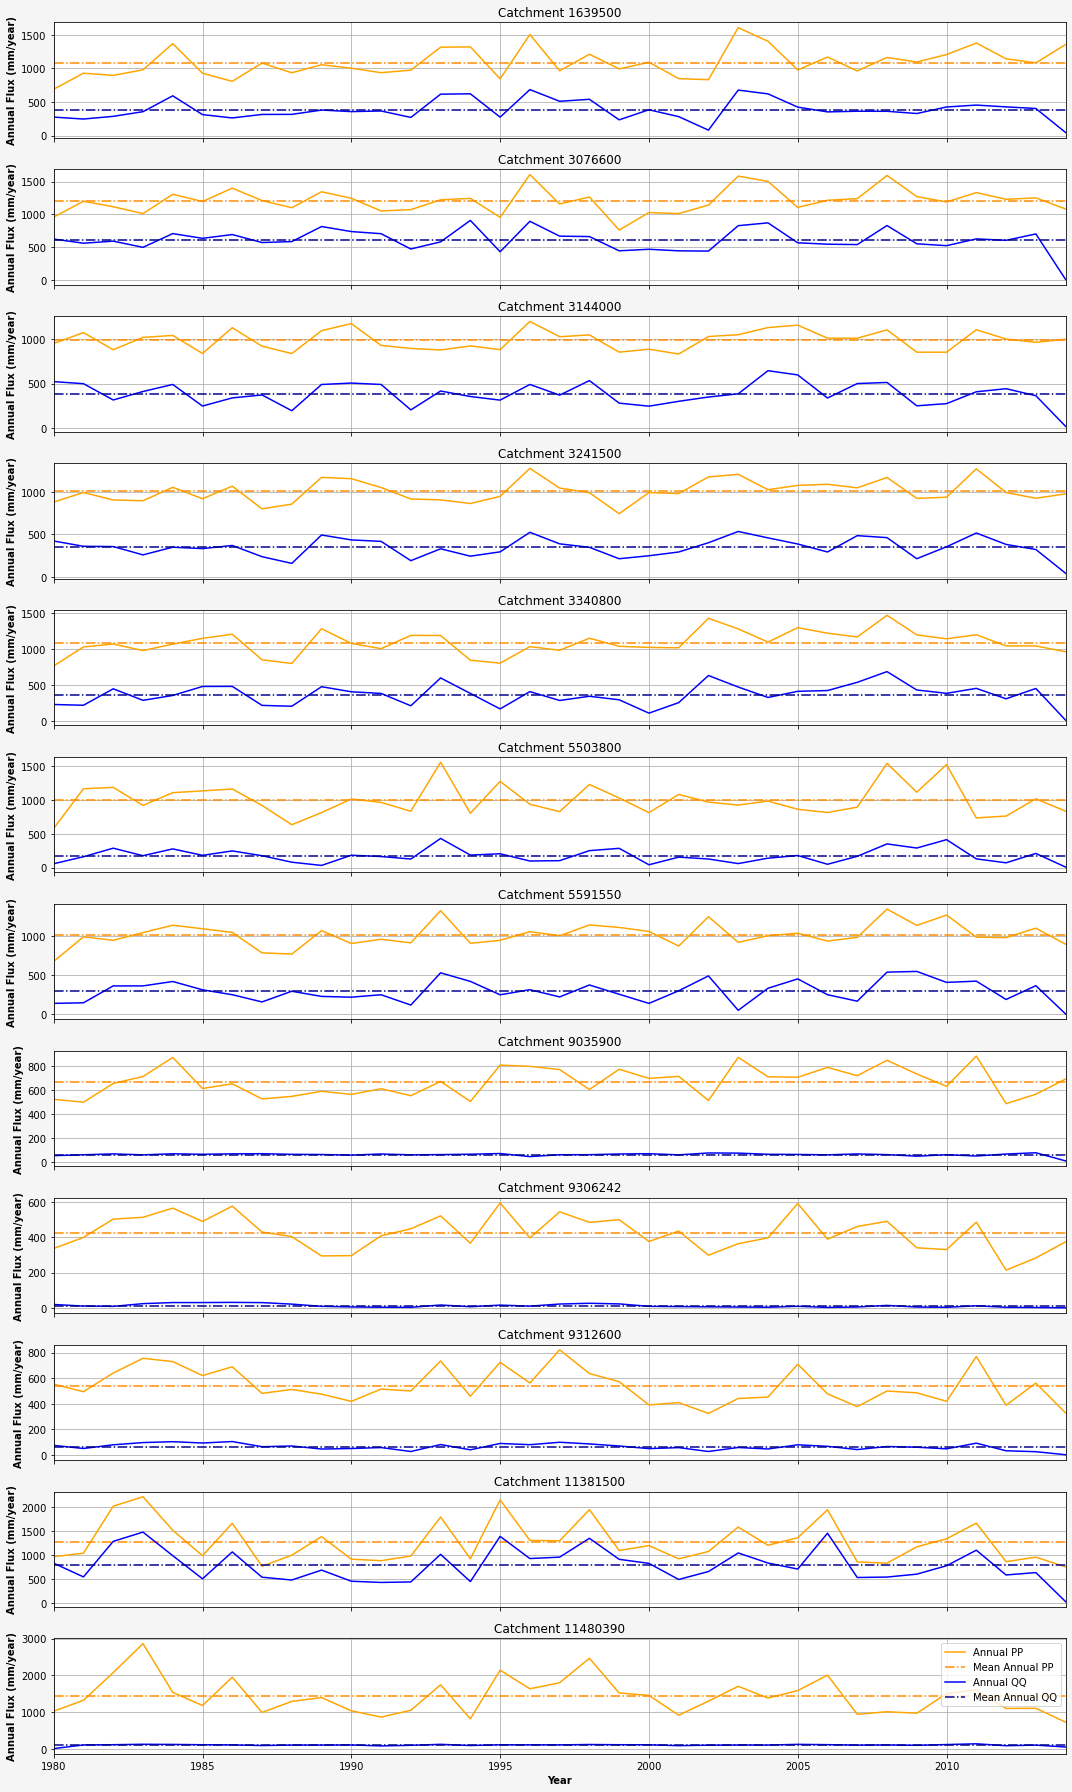

In [ ]:
catchmentList = df.index.get_level_values(0).unique().to_list()
Ncodes = len(catchmentList)
catchmentIndex = np.arange(0, Ncodes, 1)

fig, ax = plt.subplots(12,1, figsize=(15,25), sharex=True)
fig.set_facecolor('whitesmoke')

for i in catchmentIndex:
    catchment = df.loc[catchmentList[i]]
    periodStart = catchment.index.min(); periodEnd = catchment.index.max()
    x = catchment.index
    y = catchment.PP.values
    z = catchment.QQn.values
    ax[i].set_xlim(periodStart, periodEnd)
    ax[i].set_ylabel('Annual Flux (mm/year)', fontweight='bold')
    ax[-1].set_xlabel('Year', fontweight='bold')
    ax[i].plot(x,y, label='Annual PP', color='orange')
    ax[i].hlines(y=y.mean(), xmin=periodStart, xmax=periodEnd, color='darkorange', linestyles='dashdot', label='Mean Annual PP')
    ax[i].plot(x,z, label='Annual QQ', color='blue')
    ax[i].hlines(y=z.mean(), xmin=periodStart, xmax=periodEnd, color='darkblue', linestyles='dashdot', label='Mean Annual QQ')
    ax[i].set_title('Catchment {}'.format(str(catchmentList[i])))
    ax[i].grid(True)

plt.legend()
plt.tight_layout()
plt.savefig('interannualQQ-PP_12catchments')
plt.show()

# catchmentList = PPann_sum.index.get_level_values(0).unique().to_list()
# Ncodes = len(catchmentList)
# catchmentIndex = np.arange(0, Ncodes, 1)

# fig, ax = plt.subplots(12,1, figsize=(15,20), sharex=True)
# fig.set_facecolor('whitesmoke')

# for i in catchmentIndex:
#     catchment = PPann_sum.loc[catchmentList[i]]
#     periodStart = catchment.index.min(); periodEnd = catchment.index.max()
#     x = catchment.index
#     y = catchment.PP.values
#     ax[i].set_xlim(periodStart, periodEnd)
#     ax[i].set_ylabel('PP (mm/year)', fontweight='bold')
#     ax[-1].set_xlabel('Year', fontweight='bold')
#     ax[i].plot(x,y)
#     ax[i].set_title('Catchment {}'.format(str(catchmentList[i])))
#     ax[i].grid(True)

# plt.tight_layout()
# plt.show()


In [ ]:
y.mean()

1425.7628571428572

In [ ]:
# Exporting to dataframe to an excel file
fn = '/Users/omidzandi/Desktop/PhD/Courses/Fundamentals_of_Surface_Hydrology/class_project/selected_catchments_data/Surface Water Project'
annual_mean_discharge_rate.to_excel(fn + "/" + "selected_catchments_climate_forcings.xlsx")